In [4]:
import pandas as pd
import numpy as np

In [5]:
falsy_values = (0, False, None, '', [], {})


In [6]:
any(falsy_values)
#has null values

False

In [7]:
#NaN means not a number anything touches nan becomes nan 
#NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.
np.nan


nan

In [8]:
3+np.nan 

nan

In [10]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [11]:
a.sum()

nan

In [12]:
a.mean()

nan

In [13]:
3 + None


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [14]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')


In [15]:
a.sum()

nan

In [16]:
#none value is replaced by nan
a


array([ 1.,  2.,  3., nan, nan,  4.])

In [17]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])


In [18]:
a.mean()


nan

In [19]:
a.sum()

nan

In [23]:
np.inf
#infinite type 

inf

In [24]:
3 + np.inf

inf

In [25]:
np.inf / 3

inf

In [26]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)


In [27]:
b.sum()

nan

In [28]:
#There are two functions: np.isnan and np.isinf that will perform the desired checks:



In [29]:
np.isnan(np.nan)


True

In [30]:
np.isinf(np.inf)


True

In [31]:
np.isfinite(np.nan), np.isfinite(np.inf)
#can be performed together

(False, False)

In [32]:
# np.isnan and np.isinf also take arrays as inputs, and return boolean arrays as results:


np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))


array([False, False, False,  True, False, False])

In [33]:
np.isinf(np.array([1,2,3,np.nan,np.inf,4]))

array([False, False, False, False,  True, False])

In [34]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))
#for finite values

array([ True,  True,  True, False, False,  True])

In [35]:
#Whenever you're trying to perform an operation with a Numpy array and you know there 
#might be missing values, you'll need to filter them out before proceeding, to avoid nan propagation.


In [36]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])


In [40]:
a[~np.isnan(a)]
# this can be remember not of nan function a[np.isnan(a)]

array([1., 2., 3., 4.])

In [38]:
a[np.isfinite(a)]


array([1., 2., 3., 4.])

In [41]:
a[np.isfinite(a)].sum()


10.0

In [42]:
a[np.isnan(a)].sum()

nan

In [43]:
a[np.isfinite(a)].mean()


2.5

In [44]:
###Handling Missing Data with Pandas¶


In [45]:
pd.isnull(np.nan)


True

In [46]:
pd.isnull(None)


True

In [48]:
pd.isnull(np.isfinite)

#checking finite function(not null and finite values) of numpy within pandas. 

False

In [49]:
pd.isna(np.nan)


True

In [50]:
#the opposite exists 
pd.notnull(None)


False

In [51]:
pd.notnull(np.nan)


False

In [52]:
pd.notna(np.nan)


False

In [58]:
a = np.array([1,4,5,np.inf,np.nan])
pd.notnull(a)


array([ True,  True,  True,  True, False])

In [68]:
X = pd.Series([1,4,5,np.inf,np.nan])
pd.notnull(X)
#series should starts with S (case sensitive)
#pd.isnull(pd.Series([1, np.nan, 7]))



0     True
1     True
2     True
3     True
4    False
dtype: bool

In [69]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [70]:
pd.notnull(pd.Series([1, np.nan, 7]))


0     True
1    False
2     True
dtype: bool

In [71]:

pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [75]:
pd.DataFrame({'CA': [2,3,np.nan],
             'CB':[1,2,4],
             'CC':[0,5,32]
            })

#observe the values

,CA,CB,CC
0,2.0,1,0
1,3.0,2,5
2,NaN,4,32


In [76]:
pd.isnull(pd.DataFrame({'CA': [2,3,np.nan],
             'CB':[1,2,4],
             'CC':[0,5,32]
            })
)

,CA,CB,CC
0,False,False,False
1,False,False,False
2,True,False,False


In [77]:
pd.Series([1, 2, np.nan]).count()


2

In [80]:
r = pd.Series([1,4,4,8,np.nan])

In [81]:
r.count()

4

In [82]:
r.sum()


17.0

In [83]:
pd.Series([1,3,5,np.nan]).sum()

9.0

In [84]:
pd.Series([2, 2, np.nan]).mean()


2.0

In [85]:
## Filtering missing data¶



In [90]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])


In [91]:
pd.notnull(s)


0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [92]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [95]:
pd.notnull(s).sum()


4

In [96]:
pd.isnull(s).sum()


2

In [101]:
d= s[pd.notnull(s)]
#display the values that are not null in s and assigned it to a new series d

d


0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [102]:
#because no null value is assigned
pd.isnull(d)

0    False
1    False
2    False
5    False
dtype: bool

In [103]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [104]:
##Dropping null values¶


In [105]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [106]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [107]:
## Dropping null value on DataFrame
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [109]:
df


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [110]:
df.shape

(4, 4)

In [111]:
df.info()

#commulative sum 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [112]:
df.isnull()
df.isnull()


,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [113]:
df.isnull().sum()


Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [114]:
df.dropna()
#The default dropna behavior will drop all the rows in which any null value is present:



,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [115]:
df.dropna(axis=1)  # axis='columns' also works


,Column D
0,5
1,8
2,34
3,110


In [116]:

df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})


In [117]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [118]:
df2.dropna()

,Column A,Column B,Column C
2,30.0,31.0,100.0


In [119]:
df2.dropna(axis=1)
#no column exists

""
0
1
2


In [120]:
df.dropna(how='all')
#includes all

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [122]:
df.dropna(how='any')  # default behavior


,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [123]:
df


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [124]:
df.dropna(thresh=3)


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [125]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [128]:
df.dropna(thresh=3, axis=1) #or
df.dropna(thresh=3, axis='columns')


,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


In [129]:
#Filling null values

s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [130]:
s.fillna(0)


0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [131]:
s.fillna(s.mean())


0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [132]:
s



0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [133]:
s.fillna(method='ffill')


0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [134]:
s.fillna(method='bfill')


0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [135]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')


0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [136]:
pd.Series([np.nan,4,np.nan,8,7]).fillna(method='bfill')

0    4.0
1    4.0
2    8.0
3    8.0
4    7.0
dtype: float64

In [137]:
df


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [142]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})


,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [141]:
df.fillna({'Column A': 0, 'Column B': df['Column C'].mean(), 'Column C': df['Column C'].mean()})


,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,47.0,100.0,110


In [147]:
df.fillna(method='ffill',axis=0)


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [146]:
df.fillna(method='ffill', axis=1)


,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [148]:
#Example 1: Checking the length

s.dropna().count()


4

In [149]:

missing_values = len(s.dropna()) != len(s)
missing_values

True

In [150]:
len(s)


6

In [151]:
s.count()


4

In [152]:

missing_values = s.count() != len(s)
missing_values

True

In [155]:
#The methods any and all check if either there's any True value in a Series or all the values are True. 
#They work in the same way as in Python:


pd.Series([True, False, False]).any()


True

In [154]:
pd.Series([True, False, False]).all()


False

In [156]:
pd.Series([True, True, True]).all()


True

s.isnull()


In [161]:
pd.Series([1, np.nan]).isnull().any()


True

In [166]:
pd.Series(s).isnull().any()

#same as above

True

In [162]:
pd.Series([1, np.nan]).isnull().all()


False

In [163]:
s.isnull().any()


True

In [164]:
s.isnull().values


array([False, False, False,  True,  True, False])

In [165]:
s.isnull().values.any()


True

# Cleaning not-null values


In [174]:
df = pd.DataFrame({
  'Sex' : ['M','F','F','D','?'],
    'Age' : [29,39,24,290,25],
})

df

,Sex,Age
0,M,29
1,F,39
2,F,24
3,D,290
4,?,25


In [175]:
df['Sex'].unique()

#checking the values to avoid garbage values

array(['M', 'F', 'D', '?'], dtype=object)

In [176]:
df['Age'].unique()

array([ 29,  39,  24, 290,  25])

In [177]:
df['Sex'].value_counts()
#counting e.g F is 2 times

F    2
D    1
M    1
?    1
Name: Sex, dtype: int64

In [178]:
#think you just customers that D is a mistake so let's change it 
df['Sex'].replace('D', 'F')


0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [180]:
#customer also told you that there might be few N which are M in reality.
#you can change altogether
df['Sex'].replace({'D': 'F', 'N': 'M','?':'!'})


0    M
1    F
2    F
3    F
4    !
Name: Sex, dtype: object

In [181]:
#changes in many columns

df.replace({
    'Sex': {
        'D': 'F',
        '!': '?'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,39
2,F,24
3,F,29
4,?,25


In [182]:
df[df['Age'] > 100]
#simple query to find the value > 100

,Sex,Age
3,D,290


In [185]:
df[df['Sex'] == 'F']

,Sex,Age
1,F,39
2,F,24


In [197]:
df.loc[df['Age'] > 100] = df.loc[df['Age'] > 100] / 10
df


,Sex,Age
0,M,29
1,F,39
2,F,24
3,D,29
4,?,25


In [198]:

ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [199]:
ambassadors


Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [200]:
ambassadors.duplicated()


Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [201]:
ambassadors.duplicated(keep='last')
#note: filter is on column so it inverted

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [202]:
ambassadors.duplicated(keep=False)

#everything duplicate has to be considered duplicate

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [203]:
ambassadors.drop_duplicates()


Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [204]:
#keep last value 
ambassadors.drop_duplicates(keep='last')


Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [205]:
#drop all the duplicates
ambassadors.drop_duplicates(keep=False)


Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [207]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})
players


,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [210]:
players.duplicated()


0    False
1    False
2     True
3    False
4    False
dtype: bool

In [213]:
players.duplicated(subset=['Name'])
#players.duplicated(subset=['Pos'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [214]:
players.duplicated(subset=['Name'], keep='last')


0     True
1    False
2     True
3    False
4    False
dtype: bool

In [222]:
players.drop_duplicates(subset =['Name'])



,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [223]:
players.drop_duplicates(subset=['Name'], keep='last')


,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [224]:
players.drop_duplicates(subset=['Pos'], keep='last')


,Name,Pos
2,Kobe Bryant,SG
4,Kobe Bryant,SF


# Text Handling


In [246]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [247]:
df


,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [248]:
df['Data'].str.split('_')


0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [249]:
df['Data'].str.split('_', expand=True)


,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [250]:
df = df['Data'].str.split('_', expand=True)
#assign it to df


In [251]:
df


,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [252]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [253]:
df['Year'].str.contains('\?')
#see ? in the values

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [254]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [255]:
#remove blank spaces
df['Country'].str.strip()


0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [261]:
df['Country']=df['Country'].str.replace(' ', '')


In [262]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,IT,2


In [263]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [239]:
df


,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


# More Visualizations


In [264]:
import matplotlib.pyplot as plt


In [265]:
# Global API¶


In [276]:
x = np.arange(-10, 11)
y= x**2
y

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

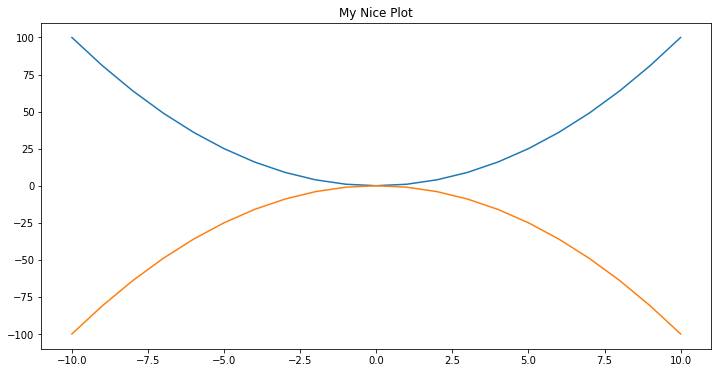

In [291]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, y)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'Y')

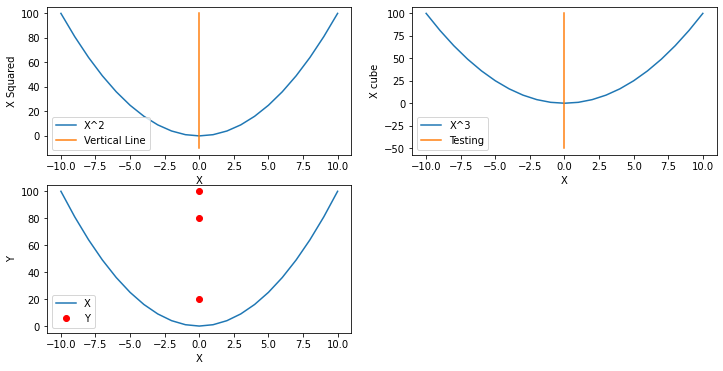

In [301]:

plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(2, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

#plt.subplot(1, 2, 2)
#plt.plot(x, -1 * (x ** 2))
#plt.plot([-10, 0, 10], [-50, -50, -50])
#plt.legend(['-X^2', 'Horizontal Line'])

#plt.xlabel('X')
#plt.ylabel('X Squared')

plt.subplot(2,2,2)
plt.plot(x, x**2)
plt.plot([0,0,0],[-50,40,100])
plt.legend(['X^3','Testing'])
plt.xlabel('X')
plt.ylabel('X cube')



plt.subplot (2,2,3)
plt.plot(x,y)
plt.plot([0,0,0],[100,20,80],'ro')
plt.legend(['X','Y'])
plt.xlabel('X')
plt.ylabel('Y')

In [310]:
# OOP Interface¶
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

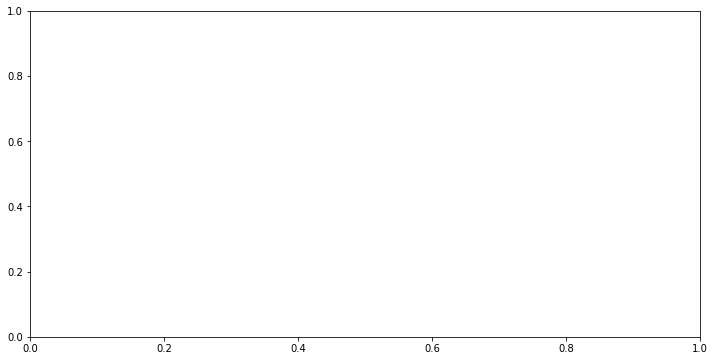

In [332]:
fig, axes = plt.subplots(figsize=(12, 6))


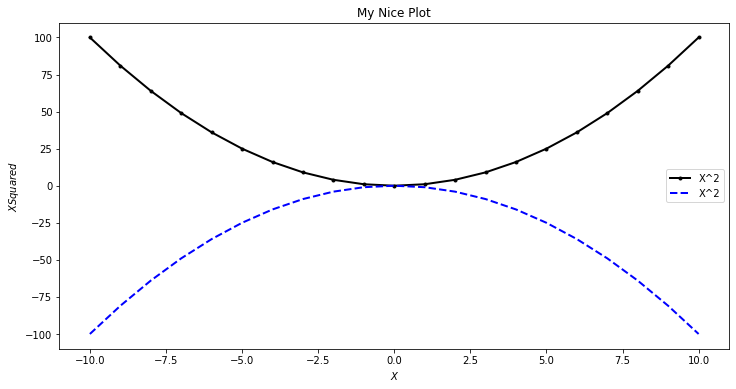

In [333]:
axes.plot(
    x, (x ** 2), color='black', linewidth=2,
    marker='o', markersize=3, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--',linewidth=2, label='X^2')

axes.set_xlabel('$X$')
axes.set_ylabel('$X Squared$') #for more professional way looks good

axes.set_title("My Nice Plot")

axes.legend()
fig


Text(0.5, 1.0, 'My Nice Plot')

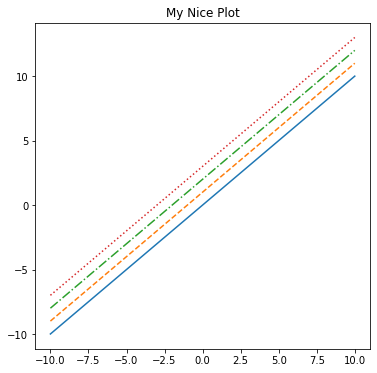

In [335]:

fig, axes = plt.subplots(figsize=(6, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

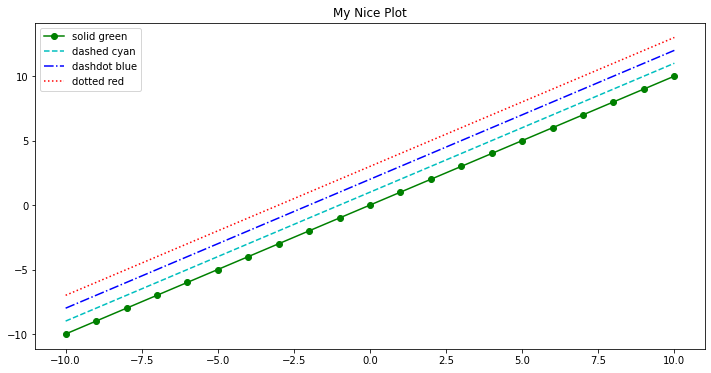

In [338]:

fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

In [339]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))


Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [340]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


In [341]:
# Other types of plots¶


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

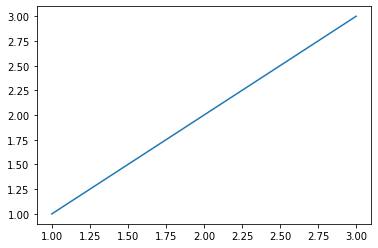

In [344]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 720x432 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

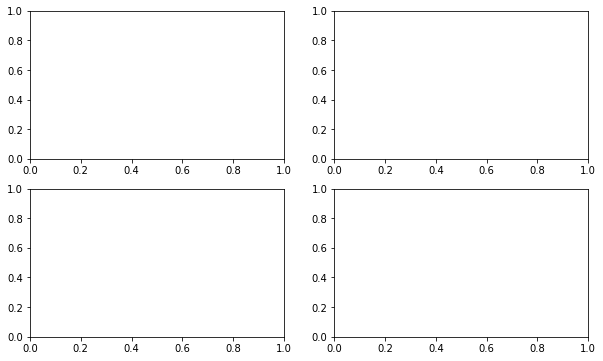

In [348]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

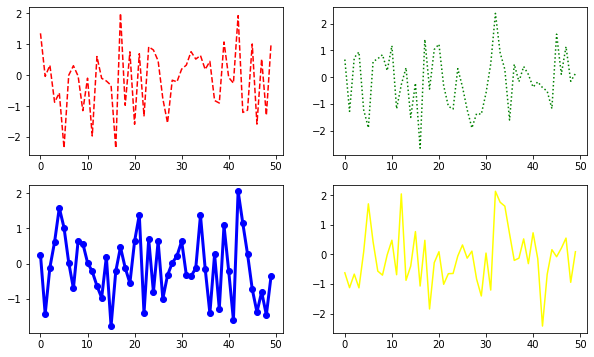

In [349]:

ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

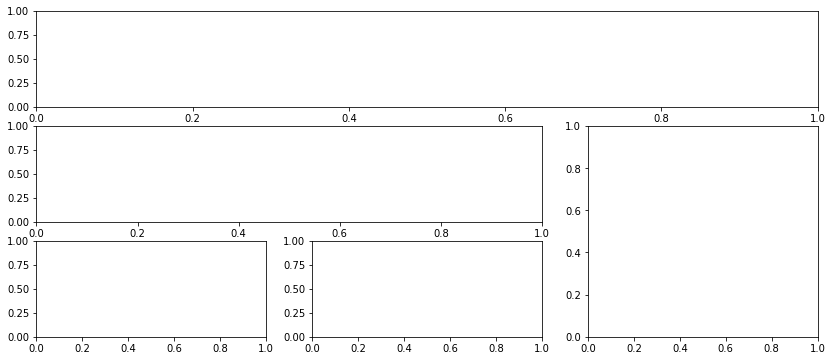

In [350]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

In [353]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii


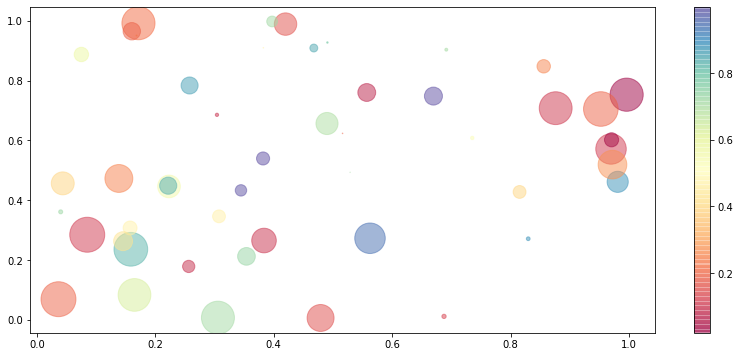

In [355]:

plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap= 'Spectral')
plt.colorbar()

plt.show()

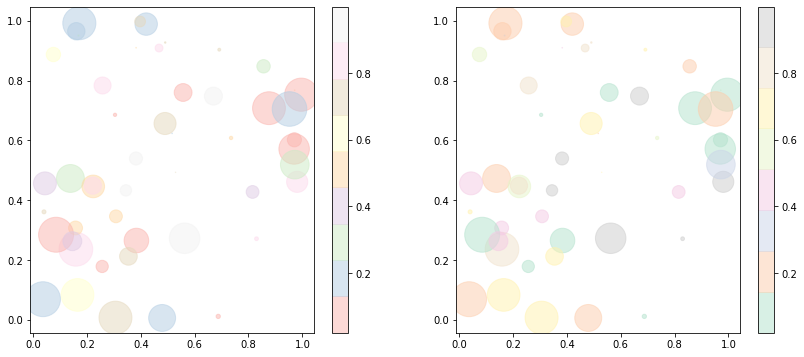

In [356]:

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

In [357]:
# Histograms¶


In [358]:
values = np.random.randn(1000)


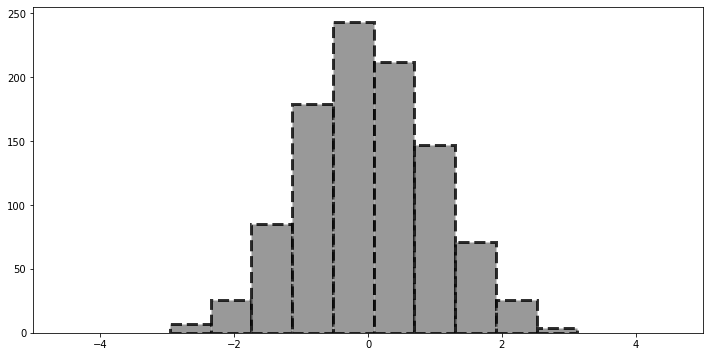

In [364]:

plt.subplots(figsize=(12, 6))

plt.hist(values, bins=10, alpha=0.8,
          histtype='bar', color='grey',
          edgecolor='black',linewidth= 3, linestyle='--')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [365]:
fig.savefig('hist.png')
#to save the figure

In [366]:
# KDE (kernel density estimation)¶



In [373]:
from scipy import stats 
# insall scipy seprately using terminal

density = stats.kde.gaussian_kde(values)
density

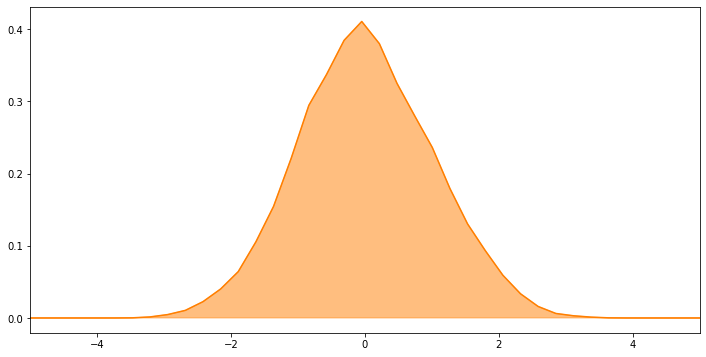

In [376]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [377]:
#Bar plot
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

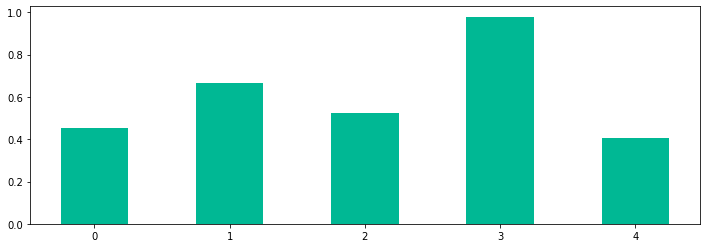

In [378]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

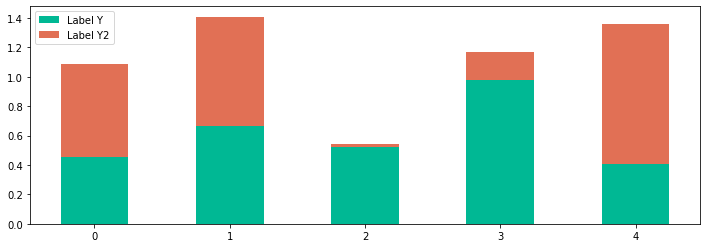

In [379]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()